# Survey of Research Security Experiences

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)

import warnings 
warnings.filterwarnings("ignore")

##  Data Assessment

In [2]:
data = pd.read_excel('/kaggle/input/share-survey-of-research-security-xlsx/Share Survey of Research Security Experiences(1-47).xlsx')

In [3]:
data.head()

,ID,Start time,Completion time,Email,Name,Last modified time,Gender,Status (academic/research),How can your research be classified?\n,Length of your research experience (in years),Have you been involved in foreign research collaboration?\n,Have you hosted foreign collaborators/students as part of your research?\n,"Have you been involved in research programs that require you to share your data, methods and knowledge?\n","Have you been involved in research that attributes the awards, patents, publications to a foreign institution? \n",Do you have third-party funding that replicated your research lab work in a foreign institution? \n,Have you travelled outside Nigeria to conduct research?,Which knowledge protection mechanism have you used before for your research output?\n,"Have you heard of the term ""dual-use research"" before?\n",Have you received any formal training or education on dual-use research issues?\n,Do you believe there is a need for more educational resources on dual-use research for researchers in your field? \n,Can your research be used for both good and evil?\n,Do you know how your research can be used for good or evil?\n,Can your research be commercialized directly?\n,Do you use the University ICT infrastructure for research?\n,How do you store your research data?\n,Have you ever lost research data due to ICT infrastructure failure or attack?\n,Do you have an antivirus?\n,How do you access the internet?\n,Have you been trained on how to identify and avoid cyber attacks?,Do you have access to the research collaboration agreement or MOU signed for your research?\n,Do you assess the potential risks associated with your own research projects in terms of dual-use concerns?\n,Do you assess(investigate) potential research collaborators/students before engagement?\n,What risks are applicable to you if your research data/idea is stolen by a collaborator/student?\n
0,3,2023-09-17 05:09:59,2023-09-17 05:14:42,anonymous,NaN,NaN,Male,Professor,Life Sciences - Human,31 - 35,Yes,Yes,Yes,Yes,No,No,Agreement;,No,No,Yes,No,No,Yes,Yes,"Locally - hard disk, flash drive;",No,Yes,Phone hotspot;,No,No,No,No,Litigation;
1,4,2023-09-17 05:43:32,2023-09-17 05:46:20,anonymous,NaN,NaN,Male,Reader,Computing,16 - 20,No,No,Yes,Yes,No,No,Patent;Creative Commons (CC) license;,Yes,Yes,Yes,Yes,No,Yes,No,"Locally - hard disk, flash drive;In the cloud ...",Yes,No,Phone hotspot;Mifi router;,No,Yes,No,No,Litigation;Loss of reputation/credentials;
2,5,2023-09-17 11:09:19,2023-09-17 11:12:37,anonymous,NaN,NaN,Female,Senior Lecturer,Computing,21 - 25,No,No,Yes,No,No,No,Copyright;Creative Commons (CC) license;,Yes,Yes,Yes,No,No,Yes,No,"Locally - hard disk, flash drive;",No,Yes,Phone hotspot;,Yes,No,No,No,Career slowdown;Promotion delay;
3,6,2023-09-17 12:03:19,2023-09-17 12:11:58,anonymous,NaN,NaN,Male,Reader,Computing,31 - 35,No,No,No,No,No,Yes,Creative Commons (CC) license;,No,No,Maybe,Yes,Yes,Yes,No,"In the cloud - Google Drive, etc;",Yes,No,Phone hotspot;,No,No,No,Yes,Career slowdown;Promotion delay;
4,7,2023-09-17 17:29:34,2023-09-17 17:34:18,anonymous,NaN,NaN,Female,Student,Computing,0 - 5,No,No,No,No,No,No,Copyright;,No,No,No,Yes,Yes,Yes,Yes,"In the cloud - Google Drive, etc;",Yes,Yes,Phone hotspot;Mifi router;,Yes,No,No,Yes,Loss of reputation/credentials;Financial depre...


In [4]:
print(data.columns)

Index(['ID', 'Start time', 'Completion time', 'Email', 'Name',
       'Last modified time', 'Gender', 'Status (academic/research)',
       'How can your research be classified?\n',
       'Length of your research experience (in years)',
       ' Have you been involved in foreign research collaboration?\n',
       'Have you hosted foreign collaborators/students as part of your research?\n',
       'Have you been involved in research programs that require you to share your data, methods and knowledge?\n',
       'Have you been involved in research that attributes the awards, patents, publications to a foreign institution? \n',
       'Do you have third-party funding that replicated your research lab work in a foreign institution? \n',
       'Have you travelled outside Nigeria to conduct research?',
       'Which knowledge protection mechanism have you used before for your research output?\n',
       'Have you heard of the term "dual-use research" before?\n',
       'Have you received an

In [5]:
data['time_diff'] = data['Completion time'] - data['Start time']

In [6]:
data['time_diff'] = data['time_diff'].apply(lambda x: f"{x.components.minutes:02d}:{x.components.seconds:02d}")
data['time_diff'].head()

0    04:43
1    02:48
2    03:18
3    08:39
4    04:44
Name: time_diff, dtype: object

## Exploratory Data Analysis

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

sns.set_style("darkgrid")

In [8]:
def custom_show(fig):
    fig.update_layout(title_x=0.5, title_y=0.9)
    fig.show('svg', width=1000, height=550)

In [9]:
plot_color = ['lightcoral','#008080']
# plot_color = ['#008080', 'black']
# sns.set_palette(['#008080', 'black'])

### `Gender`

In [10]:
gender_count = data['Gender'].value_counts()
gender_count

Gender
Male      25
Female    22
Name: count, dtype: int64

In [11]:
!pip install kaleido

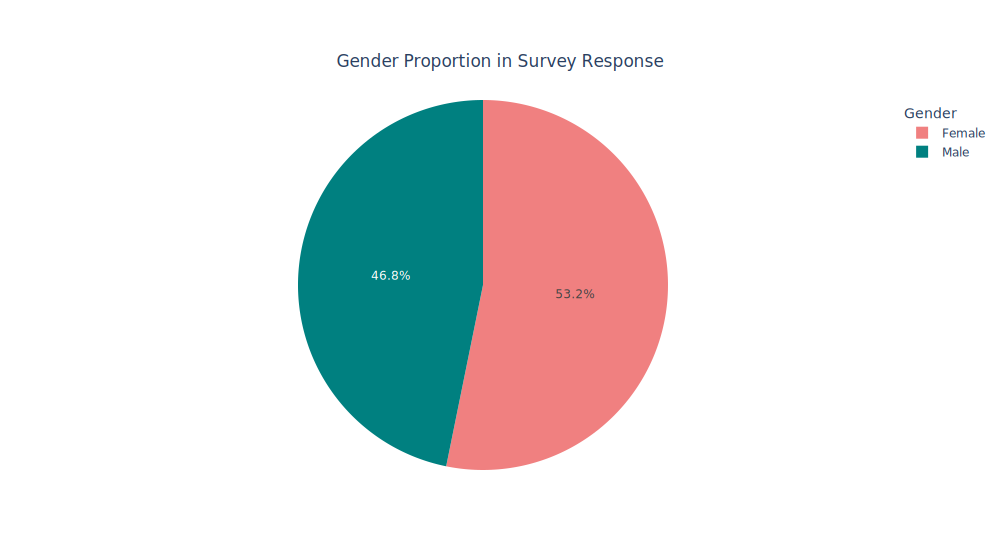

In [12]:
fig = px.pie(
    gender_count, values=gender_count.values, names=['Female', 'Male'],
    title='Gender Proportion in Survey Response',
    color_discrete_sequence=plot_color,
)

fig.update_layout(legend_title_text='Gender', title_x=0.3, title_y=0.95,)
custom_show(fig)

### `Time Diff`

In [13]:
data['time_diff'] = data['Completion time'] - data['Start time']

In [14]:
data['time_diff'] = pd.to_timedelta(data['time_diff'])
average_time = data['time_diff'].mean()

average_minutes = average_time.total_seconds() // 60
average_seconds = average_time.total_seconds() % 60

In [15]:
average_time_formatted = f"{int(average_minutes):02d}:{int(average_seconds):02d}"

print(f"Average Time to Complete Survey: {average_time_formatted}")

Average Time to Complete Survey: 07:35


### `Status (academic/research)`

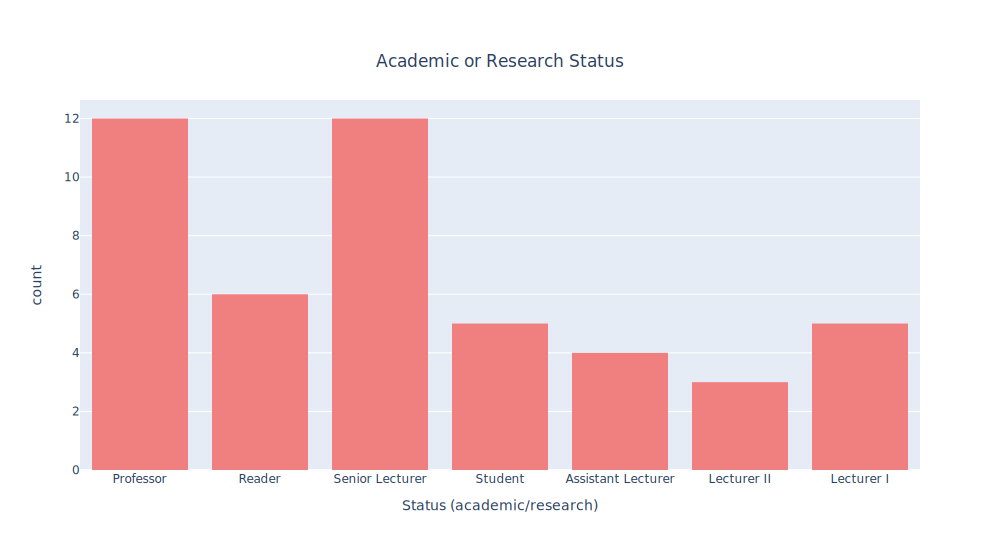

In [16]:
fig = px.histogram(data, x='Status (academic/research)', 
                   color_discrete_sequence=plot_color,
                   title="Academic or Research Status", width=700, height=500)
fig.update_layout(title_x=0.5, legend_title='Gender')
custom_show(fig)

### `Length of your research experience (in years)`

In [17]:
data['Length of your research experience (in years)'].nunique()

9

In [18]:
category_order = ['0 - 5', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 30', '31 - 35', '36 - 40', 'over 40']

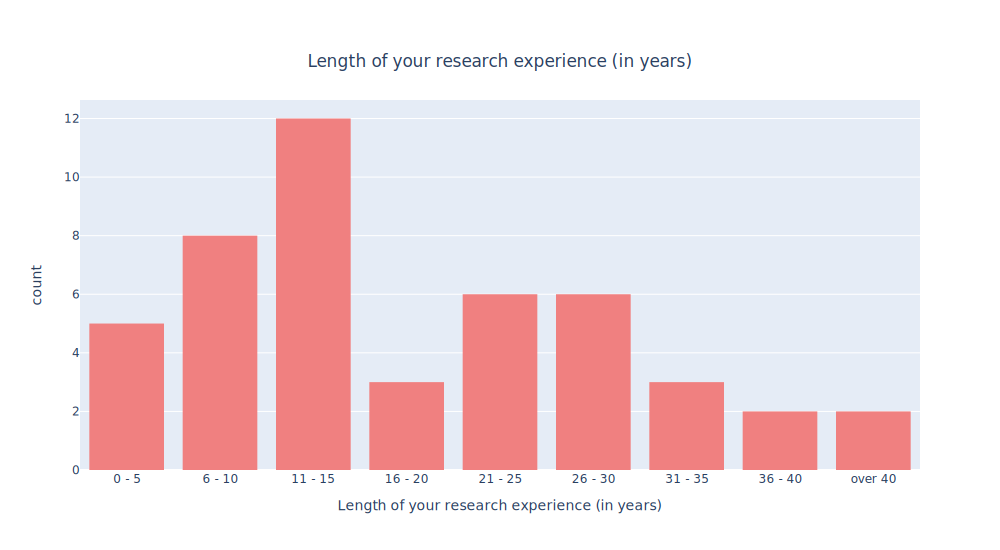

In [19]:
fig = px.histogram(data, 
                   x='Length of your research experience (in years)', 
                   color_discrete_sequence=plot_color,
                   title="Length of your research experience (in years)",
                   category_orders={'Length of your research experience (in years)': category_order},
                   width=700, height=500)

fig.update_layout(title_x=0.5, legend_title='Gender')
custom_show(fig)

### Dual-Use Research Awareness by Academic/Research Status

In [20]:
data['Have you heard of the term "dual-use research" before?\n'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

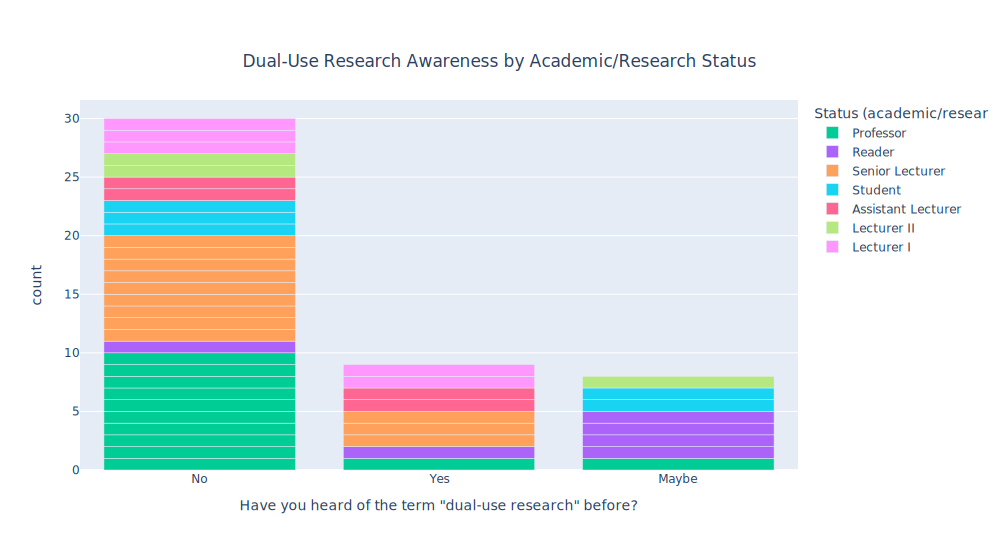

In [21]:
import plotly.express as px

# Assuming 'data' is your DataFrame
fig = px.bar(data, 
             x='Have you heard of the term "dual-use research" before?\n', 
             color="Status (academic/research)",
             title="Dual-Use Research Awareness by Academic/Research Status",
             labels={"Have you heard of the term 'dual-use research' before?\n": "Awareness"},
             category_orders={"Status (academic/research)": ["Academic", "Research"]})

fig.update_layout(title_x=0.5)
custom_show(fig)

### Cybersecurity vs AntiVirus Usage

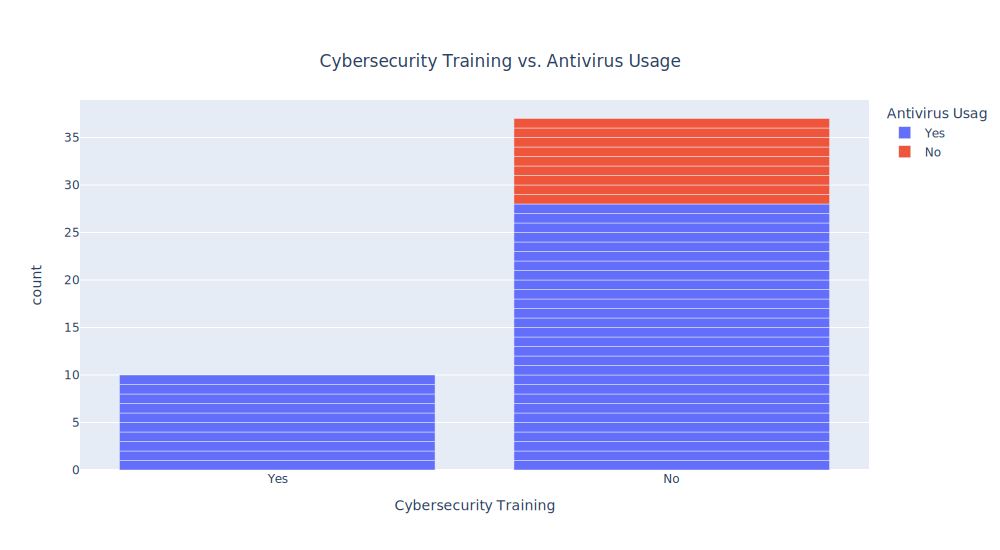

In [22]:
import plotly.express as px

# Assuming 'data' is your DataFrame
fig = px.bar(data, 
             x="Have you been trained on how to identify and avoid cyber attacks?", 
             color="Do you have an antivirus?\n",
             title="Cybersecurity Training vs. Antivirus Usage",
             labels={"Have you been trained on how to identify and avoid cyber attacks?": "Cybersecurity Training",
                     "Do you have an antivirus?\n": "Antivirus Usage"},
             category_orders={"Have you been trained on how to identify and avoid cyber attacks?": ["Yes", "No"],
                              "Do you have an antivirus?\n": ["Yes", "No"]})

fig.update_layout(title_x=0.5)
custom_show(fig)

### Use of University ICT Infrastructure for Research by Academic/Research Status

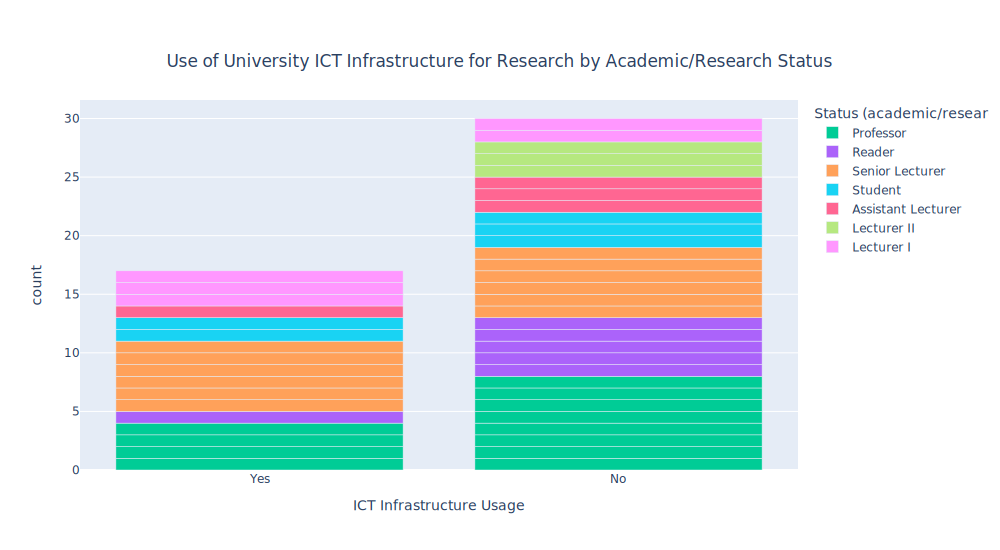

In [23]:
fig = px.bar(data, 
             x="Do you use the University ICT infrastructure for research?\n", 
             color="Status (academic/research)",
             title="Use of University ICT Infrastructure for Research by Academic/Research Status",
             labels={"Do you use the University ICT infrastructure for research?\n": "ICT Infrastructure Usage"},
             category_orders={"Do you use the University ICT infrastructure for research?\n": ["Yes", "No"],
                              "Status (academic/research)": ["Academic", "Research"]})

fig.update_layout(title_x=0.5)
custom_show(fig)

### `Have you travelled outside Nigeria to conduct research?`

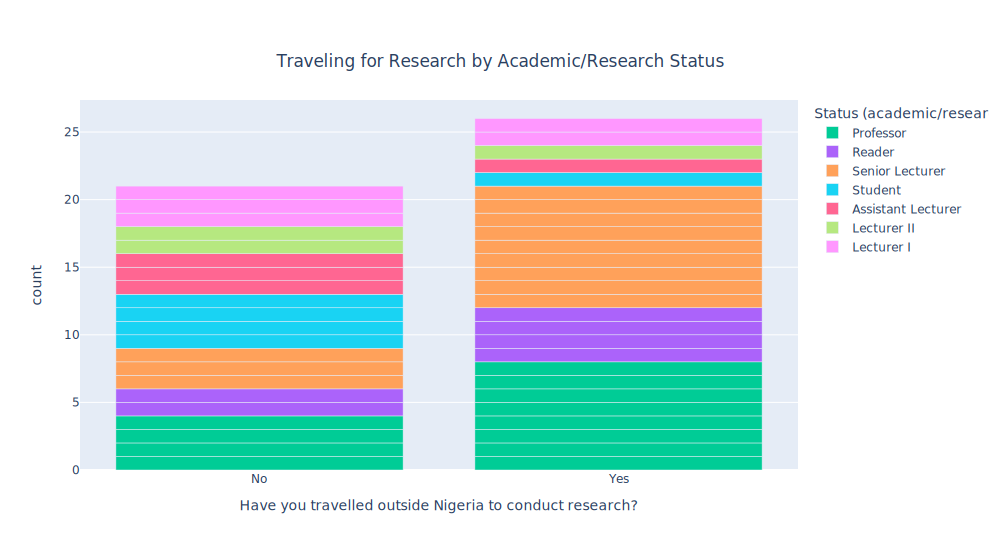

In [24]:
import plotly.express as px

# Assuming 'data' is your DataFrame
fig = px.bar(data, 
             x="Have you travelled outside Nigeria to conduct research?", 
             color="Status (academic/research)",
             title="Traveling for Research by Academic/Research Status",
             labels={"Have you traveled outside Nigeria to conduct research?": "Travel for Research"},
             category_orders={"Have you traveled outside Nigeria to conduct research?": ["Yes", "No"],
                              "Status (academic/research)": ["Academic", "Research"]})

fig.update_layout(title_x=0.5)
custom_show(fig)

### `How do you store your research data?`

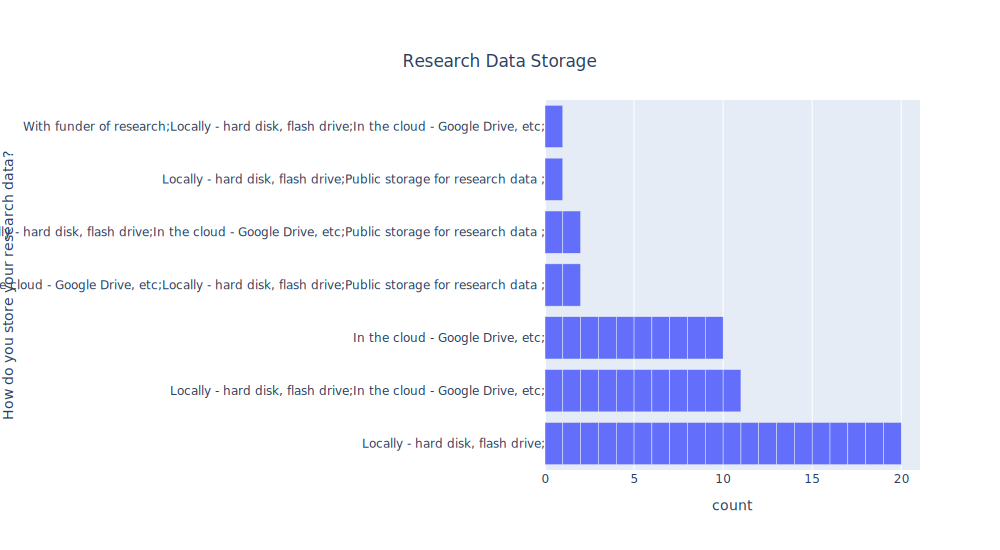

In [25]:
import plotly.express as px

# Assuming 'data' is your DataFrame
fig = px.bar(data, 
             y="How do you store your research data?\n", 
             title="Research Data Storage",
             orientation='h')

fig.update_layout(title_x=0.5)
custom_show(fig)

### `Do you assess the potential risks associated with your own research projects...`

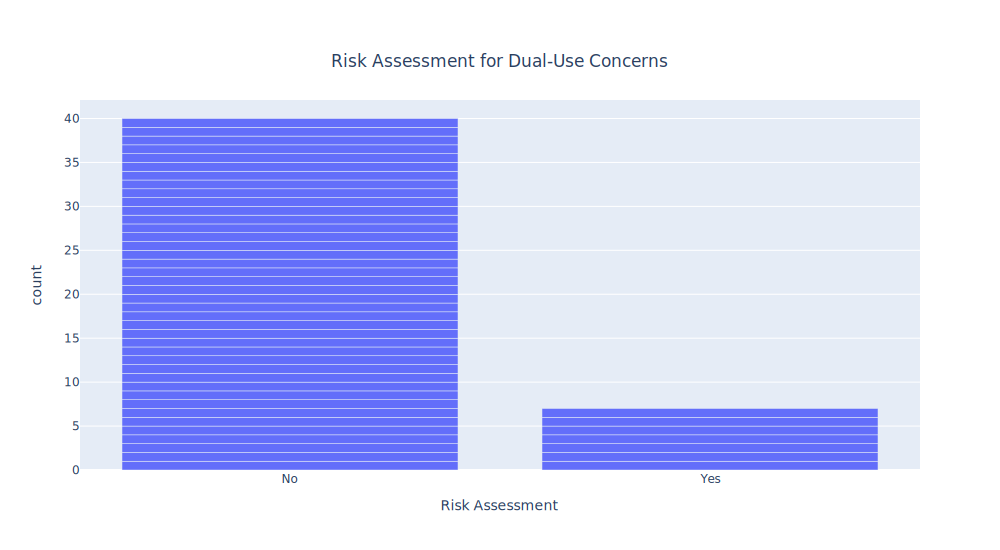

In [26]:
fig = px.bar(data, 
             x="Do you assess the potential risks associated with your own research projects in terms of dual-use concerns?\n", 
             title="Risk Assessment for Dual-Use Concerns",
             labels={"Do you assess the potential risks associated with your own research projects in terms of dual-use concerns?\n": "Risk Assessment"},)
fig.update_layout(title_x=0.5)

custom_show(fig)

##  Data Preprocessing

###  Strip White  Spaces from  Column Headers  

In [27]:
data.columns = [col.replace('\n', '') for col in data.columns]

### Drop irrelevant columns

In [28]:
irrelevant_columns = [
    'ID', 'Start time', 'Completion time', 'Email', 'Name',
    'Last modified time', 'time_diff'
]

In [29]:
data = data.drop(columns=irrelevant_columns, axis=1)

In [30]:
data.head(2)

,Gender,Status (academic/research),How can your research be classified?,Length of your research experience (in years),Have you been involved in foreign research collaboration?,Have you hosted foreign collaborators/students as part of your research?,"Have you been involved in research programs that require you to share your data, methods and knowledge?","Have you been involved in research that attributes the awards, patents, publications to a foreign institution?",Do you have third-party funding that replicated your research lab work in a foreign institution?,Have you travelled outside Nigeria to conduct research?,Which knowledge protection mechanism have you used before for your research output?,"Have you heard of the term ""dual-use research"" before?",Have you received any formal training or education on dual-use research issues?,Do you believe there is a need for more educational resources on dual-use research for researchers in your field?,Can your research be used for both good and evil?,Do you know how your research can be used for good or evil?,Can your research be commercialized directly?,Do you use the University ICT infrastructure for research?,How do you store your research data?,Have you ever lost research data due to ICT infrastructure failure or attack?,Do you have an antivirus?,How do you access the internet?,Have you been trained on how to identify and avoid cyber attacks?,Do you have access to the research collaboration agreement or MOU signed for your research?,Do you assess the potential risks associated with your own research projects in terms of dual-use concerns?,Do you assess(investigate) potential research collaborators/students before engagement?,What risks are applicable to you if your research data/idea is stolen by a collaborator/student?
0,Male,Professor,Life Sciences - Human,31 - 35,Yes,Yes,Yes,Yes,No,No,Agreement;,No,No,Yes,No,No,Yes,Yes,"Locally - hard disk, flash drive;",No,Yes,Phone hotspot;,No,No,No,No,Litigation;
1,Male,Reader,Computing,16 - 20,No,No,Yes,Yes,No,No,Patent;Creative Commons (CC) license;,Yes,Yes,Yes,Yes,No,Yes,No,"Locally - hard disk, flash drive;In the cloud ...",Yes,No,Phone hotspot;Mifi router;,No,Yes,No,No,Litigation;Loss of reputation/credentials;


### Exclude rows with Indecisive Response

In [31]:
data['Have you heard of the term "dual-use research" before?'].unique()

array(['No', 'Yes', 'Maybe'], dtype=object)

In [32]:
data = data[data['Have you heard of the term "dual-use research" before?'] != "Maybe"]

In [33]:
data['Have you heard of the term "dual-use research" before?'].unique()

array(['No', 'Yes'], dtype=object)

### Identify Features and Targets

In [34]:
data['Have you heard of the term "dual-use research" before?'] = data['Have you heard of the term "dual-use research" before?'].map({'No': 0, 'Yes': 1})

In [35]:
data['Have you heard of the term "dual-use research" before?'].unique()

array([0, 1])

In [36]:
X = data.drop(columns=['Have you heard of the term "dual-use research" before?'])
y = data['Have you heard of the term "dual-use research" before?']

### Encode Categorical Columns

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
encoder = OneHotEncoder()

In [39]:
encoded_data = encoder.fit_transform(X)

In [40]:
encoded_cols = encoder.get_feature_names_out()

In [41]:
X[encoded_cols] = encoded_data.toarray()

### Split Data Into Training and Test Set

In [42]:
X = X[encoded_cols]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [45]:
from xgboost import XGBClassifier
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [46]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Number of bootstrap samples
    n_bootstrap_samples = 1000

    n_iterations = n_bootstrap_samples

    # Initialize a list to store the metrics
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []

    for _ in range(n_iterations):
        X_boot, y_boot = resample(X_train_ns, y_train_ns, replace=True)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_boot, y_boot, test_size=0.2, random_state=42)

        model = XGBClassifier()
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)


        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
    

    mean_accuracy = np.mean(accuracy_scores)
    mean_precision = np.mean(precision_scores)
    mean_recall = np.mean(recall_scores)
    mean_f1 = np.mean(f1_scores)
    
    return mean_accuracy, mean_precision, mean_recall, mean_f1

In [47]:
def metric_df(model, model_name):
    df = evaluate_model(model, X_train, y_train, X_test, y_test)
    
    df = [df]
    model_metrics = pd.DataFrame(data = df, columns=['Accuracy','Precision', 'Recall', 'F1 Score'])
    model_metrics.insert(0, 'Model', model_name)
    
    return model_metrics

### KNN

In [48]:
from sklearn.cluster import KMeans

In [49]:
k = 3

In [50]:
kmeans = KMeans(n_clusters=k, random_state=42)

In [51]:
train_clusters = kmeans.fit_predict(X_train)
test_clusters = kmeans.fit_predict(X_test)

In [52]:
X_train['kmeans_cluster'] = train_clusters

X_test['kmeans_cluster'] = test_clusters

### Naive Resampling - Oversampling

In [53]:
from imblearn.over_sampling import RandomOverSampler

In [54]:
oversample = RandomOverSampler(sampling_strategy=0.5)
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)

In [55]:
y_train_ns.shape

(36,)

In [56]:
# Create and train model
xgb_clf_oversample = XGBClassifier()
xgb_clf_oversample.fit(X_train_ns, y_train_ns)

# Evaluate Model
xgb_clf_oversample_metrics = metric_df(xgb_clf_oversample, 'Random Oversampling')
xgb_clf_oversample_metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Oversampling,0.857125,0.761938,0.753767,0.724712


### SMOTE (Synthetic Minority Oversampling Technique)

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
oversample = SMOTE(sampling_strategy='all')
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)

In [59]:
# Create and train model
xgb_clf_smote = XGBClassifier()
xgb_clf_smote.fit(X_train_ns, y_train_ns)

# Evaluate Model
xgb_clf_smote_metrics = metric_df(xgb_clf_smote, 'SMOTE Oversampling')
xgb_clf_smote_metrics

,Model,Accuracy,Precision,Recall,F1 Score
0,SMOTE Oversampling,0.9076,0.930033,0.888938,0.89577


### Performance Comparison and Summary

In [60]:
predictions = pd.concat(
    [
        xgb_clf_smote_metrics, xgb_clf_oversample_metrics
    ],
    ignore_index=True, sort=False
)

predictions.rename(columns={'Model': 'XGBoost'}, inplace=True)

In [61]:
predictions

,XGBoost,Accuracy,Precision,Recall,F1 Score
0,SMOTE Oversampling,0.907600,0.930033,0.888938,0.895770
1,Random Oversampling,0.857125,0.761938,0.753767,0.724712
